In [3]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [4]:
# printing the data in our data set
sales_data = pd.read_csv(r"C:\Users\tinot\OneDrive\Documents\My Python Repository\Pandas\smartphone_retail_outlet_sales.csv")
sales_data

,Date,F.Y,QUARTER,P_NO,PAYMENT TYPE,TYPE OF PRODUCT,Quantity,Price,Amount,TYPE OF ACCESSORY/MOBILE
0,01-04-2018,2018-2019,1,P/A/36,CASH,ACCESSORY,1,2042.38,2542.38,COVER
1,01-04-2018,2018-2019,1,P/A/47,CASH,ACCESSORY,1,2042.38,2118.64,WIRELESS HEADSET
2,01-04-2018,2018-2019,1,P/M/A34,CREDIT,MOBILE,1,2042.38,13303.58,BUDGET PHONE
3,01-04-2018,2018-2019,1,P/M/A42,CREDIT,MOBILE,1,2042.38,51696.43,FLAGSHIP PHONE
4,01-04-2018,2018-2019,1,P/M/A42,DEBIT,MOBILE,1,2042.38,51696.42,FLAGSHIP PHONE
...,...,...,...,...,...,...,...,...,...,...
6416,11-07-2021,2021-2022,2,P/M/A64,MOBILE PAYMENTS,MOBILE,1,16455.36,16955.36,MIDRANGE PHONE
6417,12-07-2021,2021-2022,2,P/M/A64,CASH,MOBILE,1,16455.36,16955.36,MIDRANGE PHONE
6418,14-07-2021,2021-2022,2,P/M/A64,DEBIT,MOBILE,1,16455.36,16955.36,MIDRANGE PHONE
6419,14-07-2021,2021-2022,2,P/M/A64,CREDIT,MOBILE,1,16455.36,16955.36,MIDRANGE PHONE


# Data Cleaning and Statistical Overview

In [5]:
# viewing column names
sales_data.columns

Index(['Date', 'F.Y', 'QUARTER', 'P_NO', 'PAYMENT TYPE', 'TYPE OF PRODUCT',
       'Quantity', 'Price', 'Amount', 'TYPE OF ACCESSORY/MOBILE'],
      dtype='object')

In [6]:
# cleaning column names
sales_data.columns=sales_data.columns.str.lower()
sales_data.columns=sales_data.columns.str.replace(" ","_")
sales_data.columns=sales_data.columns.str.replace("/","_")
sales_data.columns=sales_data.columns.str.replace("Date","date")
sales_data.columns=sales_data.columns.str.replace("f.y","fisal_year")
sales_data.columns=sales_data.columns.str.replace("QUARTER","quarter")
sales_data.columns=sales_data.columns.str.replace("p_no","product_number")
sales_data.columns=sales_data.columns.str.replace("PAYMENT TYPE","payment_type")
sales_data.columns=sales_data.columns.str.replace("TYPE OF PRODUCT","type_of_product")
sales_data.columns=sales_data.columns.str.replace("Quantity","quantity")
sales_data.columns=sales_data.columns.str.replace("Price","price")
sales_data.columns=sales_data.columns.str.replace("amount","amount_paid")
sales_data.columns=sales_data.columns.str.replace("TYPE OF ACCESSORY/MOBILE","type_of_accessory_mobile")
sales_data.columns

Index(['date', 'fisal_year', 'quarter', 'product_number', 'payment_type',
       'type_of_product', 'quantity', 'price', 'amount_paid',
       'type_of_accessory_mobile'],
      dtype='object')

In [7]:
# Summary of the object's metadata and column information(total_rows, data_types)
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6421 entries, 0 to 6420
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      6421 non-null   object 
 1   fisal_year                6421 non-null   object 
 2   quarter                   6421 non-null   int64  
 3   product_number            6420 non-null   object 
 4   payment_type              6421 non-null   object 
 5   type_of_product           6421 non-null   object 
 6   quantity                  6421 non-null   int64  
 7   price                     6421 non-null   float64
 8   amount_paid               6421 non-null   float64
 9   type_of_accessory_mobile  6421 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 501.8+ KB


In [8]:
# Descpritive statistics of the numerical columns in our data object
sales_data.describe()

,quarter,quantity,price,amount_paid
count,6421.000000,6421.000000,6421.000000,6421.000000
mean,2.249338,1.058246,18295.175739,19255.968355
std,1.000452,0.949686,19855.194755,20608.895584
min,1.000000,1.000000,410.710000,915.260000
25%,1.000000,1.000000,5026.780000,5892.860000
50%,2.000000,1.000000,13776.780000,14284.820000
75%,3.000000,1.000000,20919.640000,21419.640000
max,4.000000,30.000000,104767.860000,230803.570000


In [9]:
# Counting the number of missing values in each column to determine our next step
sales_data.isna().sum()

date                        0
fisal_year                  0
quarter                     0
product_number              1
payment_type                0
type_of_product             0
quantity                    0
price                       0
amount_paid                 0
type_of_accessory_mobile    0
dtype: int64

In [10]:
# Drop missing values, we have few missing values, so this won't affect our dataset that much
sales_data.dropna(inplace=True)

In [11]:
sales_data.isna().sum()

date                        0
fisal_year                  0
quarter                     0
product_number              0
payment_type                0
type_of_product             0
quantity                    0
price                       0
amount_paid                 0
type_of_accessory_mobile    0
dtype: int64

In [12]:
# check for duplicated rows
sales_data.duplicated().sum()

665

In [13]:
sales_data

,date,fisal_year,quarter,product_number,payment_type,type_of_product,quantity,price,amount_paid,type_of_accessory_mobile
0,01-04-2018,2018-2019,1,P/A/36,CASH,ACCESSORY,1,2042.38,2542.38,COVER
1,01-04-2018,2018-2019,1,P/A/47,CASH,ACCESSORY,1,2042.38,2118.64,WIRELESS HEADSET
2,01-04-2018,2018-2019,1,P/M/A34,CREDIT,MOBILE,1,2042.38,13303.58,BUDGET PHONE
3,01-04-2018,2018-2019,1,P/M/A42,CREDIT,MOBILE,1,2042.38,51696.43,FLAGSHIP PHONE
4,01-04-2018,2018-2019,1,P/M/A42,DEBIT,MOBILE,1,2042.38,51696.42,FLAGSHIP PHONE
...,...,...,...,...,...,...,...,...,...,...
6416,11-07-2021,2021-2022,2,P/M/A64,MOBILE PAYMENTS,MOBILE,1,16455.36,16955.36,MIDRANGE PHONE
6417,12-07-2021,2021-2022,2,P/M/A64,CASH,MOBILE,1,16455.36,16955.36,MIDRANGE PHONE
6418,14-07-2021,2021-2022,2,P/M/A64,DEBIT,MOBILE,1,16455.36,16955.36,MIDRANGE PHONE
6419,14-07-2021,2021-2022,2,P/M/A64,CREDIT,MOBILE,1,16455.36,16955.36,MIDRANGE PHONE


In [14]:
# delete rows of duplicated data
sales_data = sales_data.drop_duplicates()

In [15]:
sales_data

,date,fisal_year,quarter,product_number,payment_type,type_of_product,quantity,price,amount_paid,type_of_accessory_mobile
0,01-04-2018,2018-2019,1,P/A/36,CASH,ACCESSORY,1,2042.38,2542.38,COVER
1,01-04-2018,2018-2019,1,P/A/47,CASH,ACCESSORY,1,2042.38,2118.64,WIRELESS HEADSET
2,01-04-2018,2018-2019,1,P/M/A34,CREDIT,MOBILE,1,2042.38,13303.58,BUDGET PHONE
3,01-04-2018,2018-2019,1,P/M/A42,CREDIT,MOBILE,1,2042.38,51696.43,FLAGSHIP PHONE
4,01-04-2018,2018-2019,1,P/M/A42,DEBIT,MOBILE,1,2042.38,51696.42,FLAGSHIP PHONE
...,...,...,...,...,...,...,...,...,...,...
5991,24-01-2022,2021-2022,4,P/M/A16,DEBIT,MOBILE,1,27177.68,27677.68,MIDRANGE PHONE
5992,25-01-2022,2021-2022,4,P/M/A16,MOBILE PAYMENTS,MOBILE,1,27177.68,27677.68,MIDRANGE PHONE
5993,01-02-2022,2021-2022,4,P/M/A16,CREDIT,MOBILE,1,27177.68,27677.68,MIDRANGE PHONE
5994,03-02-2022,2021-2022,4,P/M/A16,MOBILE PAYMENTS,MOBILE,1,27177.68,27677.68,MIDRANGE PHONE


In [16]:
# Convert the date column to datetime format:
sales_data['date'] = pd.to_datetime(sales_data['date'], format = 'mixed')

C:\Users\tinot\AppData\Local\Temp\ipykernel_7304\1259188920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['date'] = pd.to_datetime(sales_data['date'], format = 'mixed')


In [17]:
# calculate the price difference between the current price and amount paid
sales_data['price_diff'] = sales_data['amount_paid'] - sales_data['price']

C:\Users\tinot\AppData\Local\Temp\ipykernel_7304\1942055105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['price_diff'] = sales_data['amount_paid'] - sales_data['price']


In [18]:
sales_data

,date,fisal_year,quarter,product_number,payment_type,type_of_product,quantity,price,amount_paid,type_of_accessory_mobile,price_diff
0,2018-01-04,2018-2019,1,P/A/36,CASH,ACCESSORY,1,2042.38,2542.38,COVER,500.00
1,2018-01-04,2018-2019,1,P/A/47,CASH,ACCESSORY,1,2042.38,2118.64,WIRELESS HEADSET,76.26
2,2018-01-04,2018-2019,1,P/M/A34,CREDIT,MOBILE,1,2042.38,13303.58,BUDGET PHONE,11261.20
3,2018-01-04,2018-2019,1,P/M/A42,CREDIT,MOBILE,1,2042.38,51696.43,FLAGSHIP PHONE,49654.05
4,2018-01-04,2018-2019,1,P/M/A42,DEBIT,MOBILE,1,2042.38,51696.42,FLAGSHIP PHONE,49654.04
...,...,...,...,...,...,...,...,...,...,...,...
5991,2022-01-24,2021-2022,4,P/M/A16,DEBIT,MOBILE,1,27177.68,27677.68,MIDRANGE PHONE,500.00
5992,2022-01-25,2021-2022,4,P/M/A16,MOBILE PAYMENTS,MOBILE,1,27177.68,27677.68,MIDRANGE PHONE,500.00
5993,2022-01-02,2021-2022,4,P/M/A16,CREDIT,MOBILE,1,27177.68,27677.68,MIDRANGE PHONE,500.00
5994,2022-03-02,2021-2022,4,P/M/A16,MOBILE PAYMENTS,MOBILE,1,27177.68,27677.68,MIDRANGE PHONE,500.00


In [19]:
#print available themes
print(plt.style.available)
plt.style.use('tableau-colorblind10')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


# Dimensionality Reduction

In [20]:
# Select numerical columns
numeric_cols = ['amount_paid', 'price', 'price_diff']

# Scale the numerical columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sales_data[numeric_cols])

# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Print the explained variance ratio
print(pca.explained_variance_ratio_)

[6.63717671e-01 3.36282329e-01 1.85354162e-31]


# Measures of Central Tendency

In [21]:
# Calculate measures of central tendency
mean_price = np.mean(sales_data['price'])
median_price = np.median(sales_data['price'])
mode_price = sales_data['price'].mode().values[0]

print(f"Mean Price: {mean_price:.2f}")
print(f"Median Price: {median_price:.2f}")
print(f"Mode Price: {mode_price:.2f}")

Mean Price: 18061.38
Median Price: 12446.42
Mode Price: 508.48


C:\Users\tinot\AppData\Local\Temp\ipykernel_7304\3616728272.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['price'], bins=20)
C:\Users\tinot\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


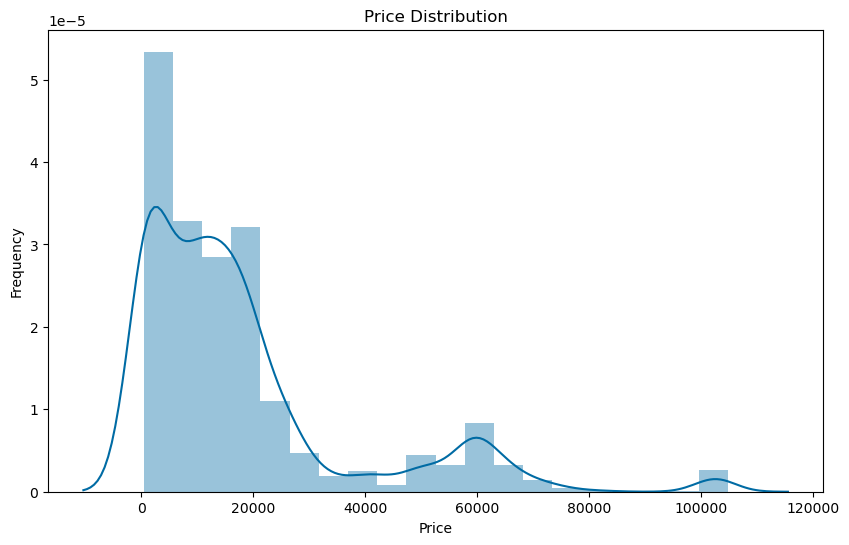

In [22]:
# Distribution of Prices
plt.figure(figsize=(10,6))
sns.distplot(sales_data['price'], bins=20)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [45]:
# Calculate measures of central tendency
mean_amount_paid = np.mean(sales_data['amount_paid'])
median_amount_paid = np.median(sales_data['amount_paid'])
mode_amount_paid = sales_data['amount_paid'].mode().values[0]

print(f"Mean Amount Paid: {mean_amount_paid:.2f}")
print(f"Median Amount Paid: {median_amount_paid:.2f}")
print(f"Mode Amount Paid: {mode_amount_paid:.2f}")

Mean Amount Paid: 19075.50
Median Amount Paid: 13383.92
Mode Amount Paid: 1008.48


C:\Users\tinot\AppData\Local\Temp\ipykernel_7304\1826592261.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['amount_paid'], bins=20)
C:\Users\tinot\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


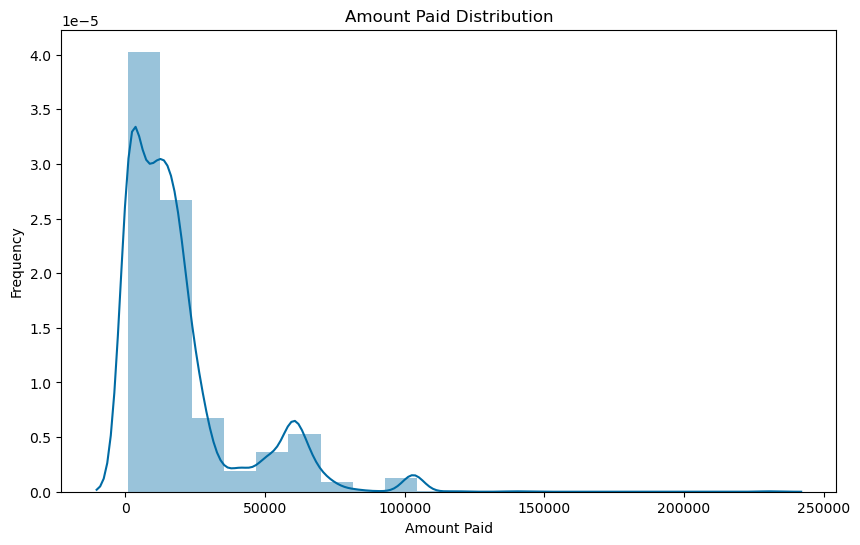

In [44]:
# Distribution of Amount Paid
plt.figure(figsize=(10,6))
sns.distplot(sales_data['amount_paid'], bins=20)
plt.title('Amount Paid Distribution')
plt.xlabel('Amount Paid')
plt.ylabel('Frequency')
plt.show()

# Qualitative Analysis of Categorical Data

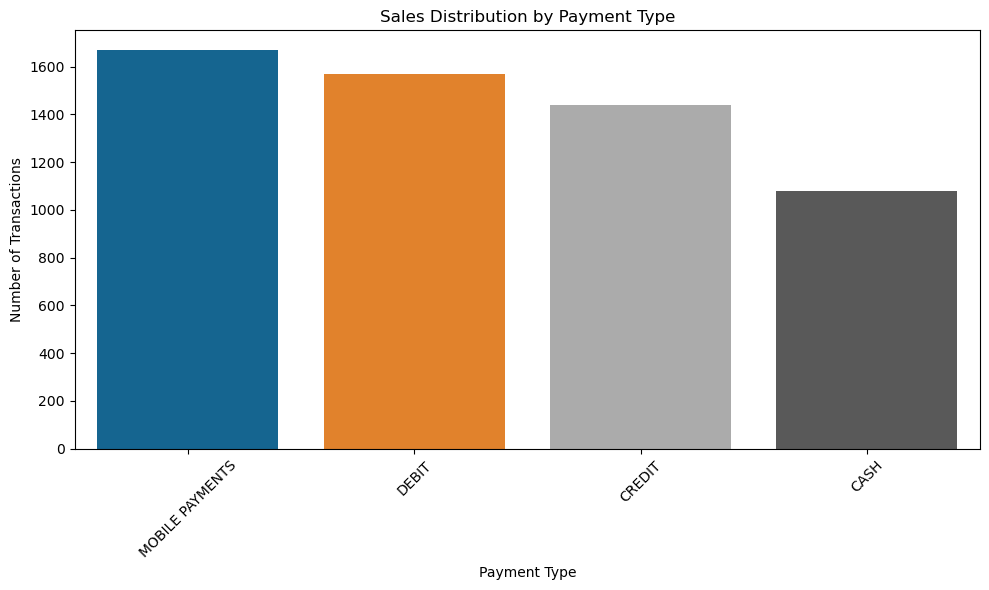

In [23]:
# Analyzing sales by payment type
plt.figure(figsize=(10, 6))
sns.countplot(data=sales_data, x='payment_type', order = sales_data['payment_type'].value_counts().index)
plt.title('Sales Distribution by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

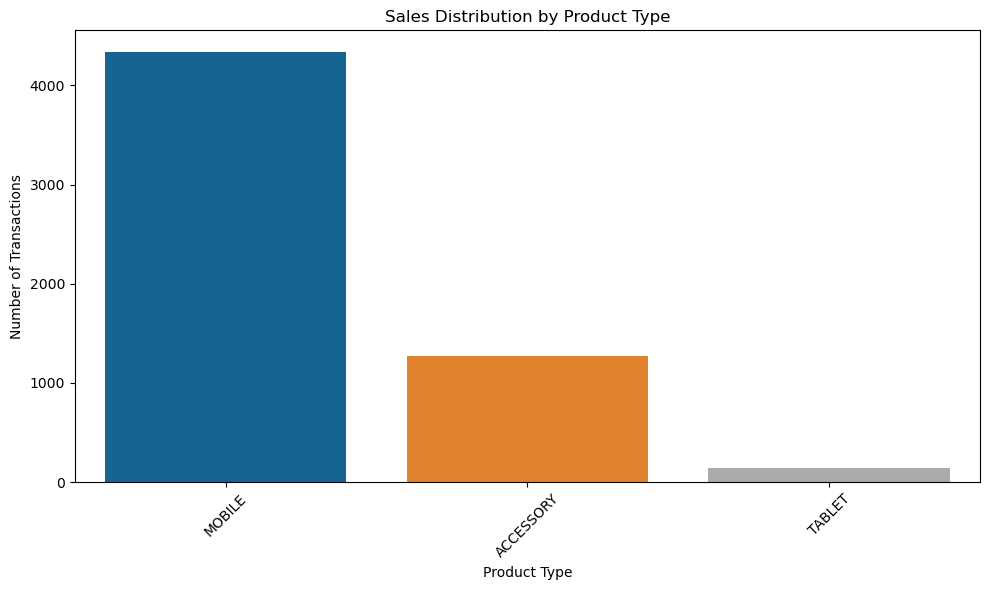

In [24]:
# Analyzing sales by product type
plt.figure(figsize=(10, 6))
sns.countplot(data=sales_data, x='type_of_product', order = sales_data['type_of_product'].value_counts().index)
plt.title('Sales Distribution by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

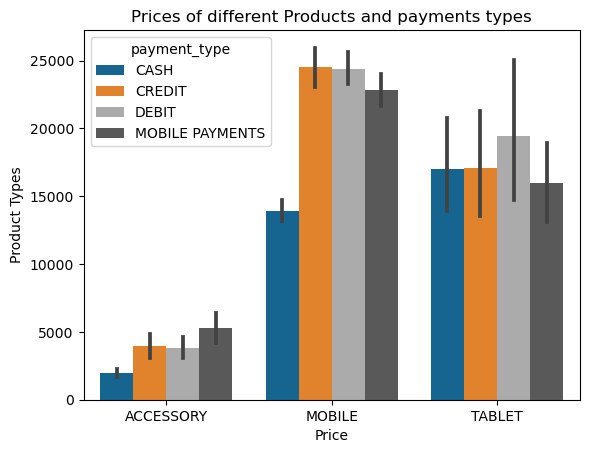

In [25]:
# Products bought vs Payment Types
product_price_type=sns.barplot(data=sales_data,x='type_of_product',y='price',hue='payment_type')
product_price_type.set_title('Prices of different Products and payments types')
product_price_type.set_xlabel('Price')
product_price_type.set_ylabel('Product Types');

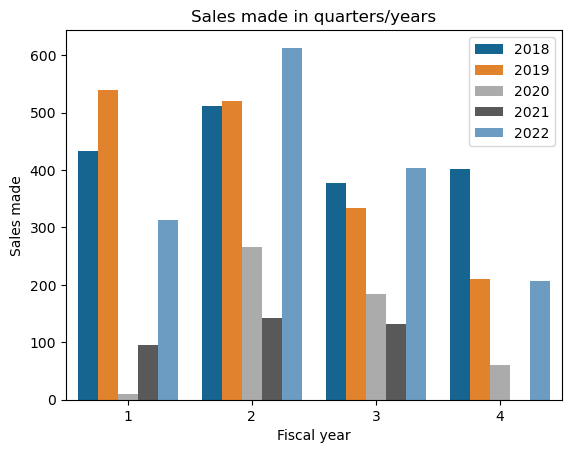

In [26]:
# sales made in quaters
quarter_plot=sns.countplot(data=sales_data,x="quarter",hue="fisal_year")
quarter_plot.set_title('Sales made in quarters/years')
quarter_plot.set_xlabel('Fiscal year')
plt.legend(labels=['2018','2019','2020','2021','2022'])
quarter_plot.set_ylabel('Sales made');

C:\Users\tinot\AppData\Local\Temp\ipykernel_7304\530025768.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['date'] = pd.to_datetime(sales_data['date'], format='%d-%m-%Y')
C:\Users\tinot\AppData\Local\Temp\ipykernel_7304\530025768.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['day_of_week'] = sales_data['date'].dt.day_name()


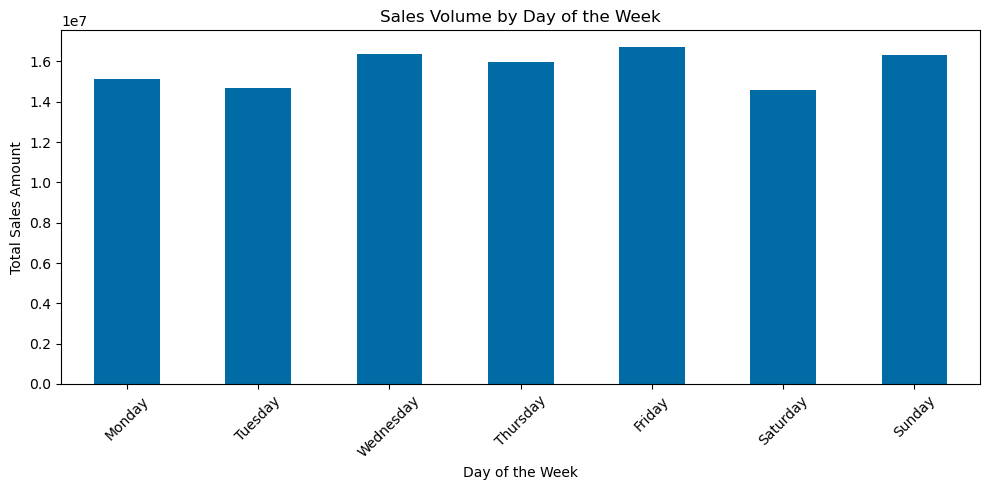

In [27]:
# Relationship between day of the week and sales volume
# First, we need to convert 'Date' to datetime format to extract the day of the week
sales_data['date'] = pd.to_datetime(sales_data['date'], format='%d-%m-%Y')
sales_data['day_of_week'] = sales_data['date'].dt.day_name()
sales_by_day_of_week = sales_data.groupby('day_of_week')['amount_paid'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting sales by day of the week
plt.figure(figsize=(10, 5))
sales_by_day_of_week.plot(kind='bar')
plt.title('Sales Volume by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Measures of  Data Dispersion

In [28]:
# Calculate measures of data dispersion
price_range = np.max(sales_data['price']) - np.min(sales_data['price'])
price_var = np.var(sales_data['price'])
price_std = np.std(sales_data['price'])

print(f"Price range: {price_range:.2f}")
print(f"Price variance: {price_var:.2f}")
print(f"Price standard deviation: {price_std:.2f}")

Price range: 104357.15
Price variance: 410235232.98
Price standard deviation: 20254.26


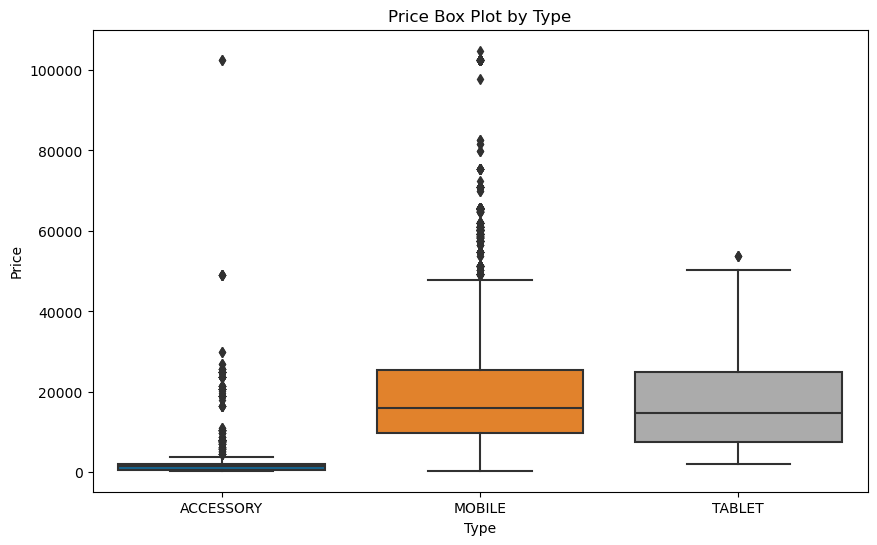

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(x=sales_data['type_of_product'], y=sales_data['price'])
plt.title('Price Box Plot by Type')
plt.xlabel('Type')
plt.ylabel('Price')
plt.show()

In [30]:
# Calculate measures of data dispersion
amount_paid_range = np.max(sales_data['amount_paid']) - np.min(sales_data['amount_paid'])
amount_paid_var = np.var(sales_data['amount_paid'])
amount_paid_std = np.std(sales_data['amount_paid'])

print(f"Amount paid range: {amount_paid_range:.2f}")
print(f"Amount paid variance: {amount_paid_var:.2f}")
print(f"Amount paid standard deviation: {amount_paid_std:.2f}")

Amount paid range: 229888.31
Amount paid variance: 444470109.88
Amount paid standard deviation: 21082.46


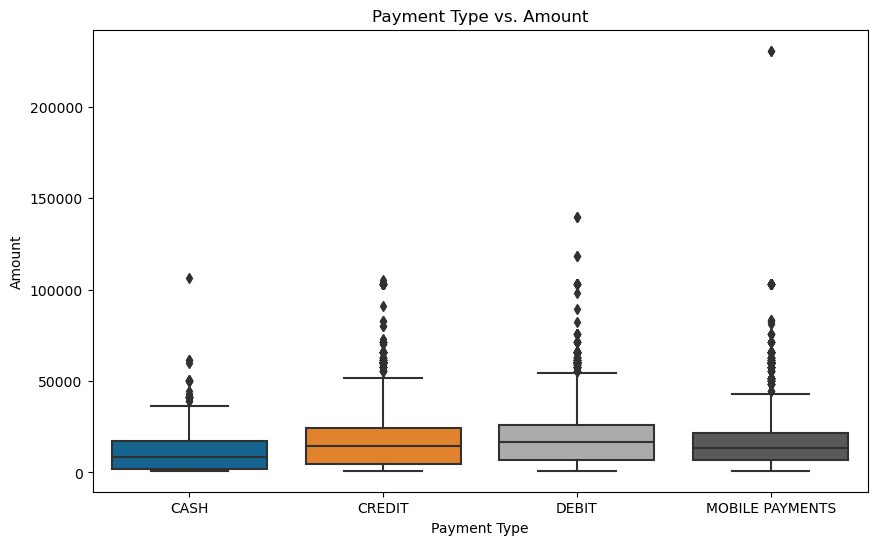

In [31]:
# Example for boxplot comparison between 'Payment Type' and 'Amount'
plt.figure(figsize=(10, 6))
sns.boxplot(x=sales_data['payment_type'], y=sales_data['amount_paid'])
plt.xlabel('Payment Type')
plt.ylabel('Amount')
plt.title('Payment Type vs. Amount')
plt.show()

# Covariance and Correlation Analysis

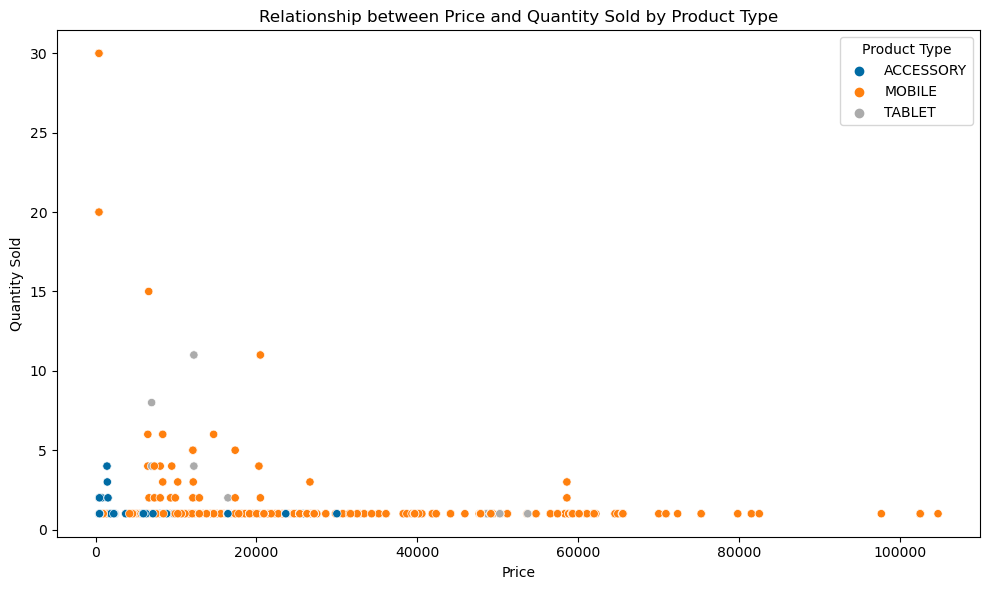

In [34]:
# Relationship between price and quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sales_data, x='price', y='quantity', hue='type_of_product')
plt.title('Relationship between Price and Quantity Sold by Product Type')
plt.xlabel('Price')
plt.ylabel('Quantity Sold')
plt.legend(title='Product Type')
plt.tight_layout()
plt.show()

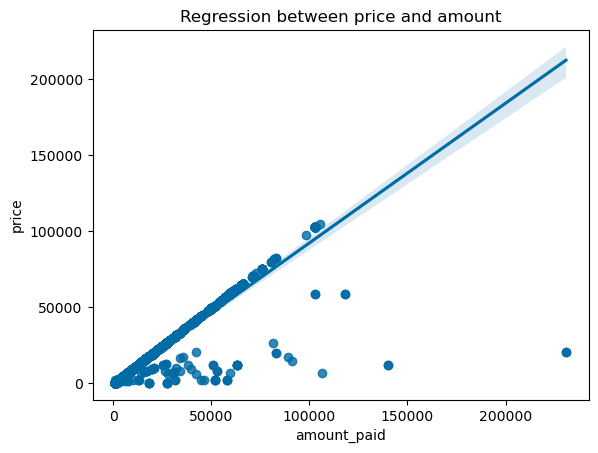

In [35]:
# Create a regression analysis
# In the end we see people ended paying up more than the price because of other additional costs
# Analyzing the differences between the price of an item and the total amount paid in a sales 
# dataset can provide valuable insights into various aspects of the sales process and customer behaviour.
# Conclusions to the amount paid can either be due to discounts and promotions, pricing accuracy,
# sales tax

sns.regplot(data=sales_data,x='amount_paid',y='price')
plt.title('Regression between price and amount');

# Outlier Detection

In [37]:
# Correcting the code to exclude the customer demographics analysis
# Identify outliers in sales amounts
sales_data['z_score_amount'] = (sales_data['amount_paid'] - sales_data['amount_paid'].mean()) / sales_data['amount_paid'].std()
outliers = sales_data[sales_data['z_score_amount'].abs() > 3]

# Investigate outliers in more detail
# We will look at the details of the transactions that are outliers
outlier_details = outliers[['date', 'product_number', 'payment_type', 'type_of_product', 'quantity', 'price', 'amount_paid', 'type_of_accessory_mobile']]

# Analyzing product sales trends
# Grouping data by product number and summing up the quantities to see which products are best sellers
product_sales = sales_data.groupby('product_number')['quantity'].sum().sort_values(ascending=False)

# Examining sales performance by payment type
payment_type_sales = sales_data.groupby('payment_type')['amount_paid'].sum().sort_values(ascending=False)

(outlier_details.head(), product_sales.head(10), payment_type_sales)

C:\Users\tinot\AppData\Local\Temp\ipykernel_7304\3646308288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['z_score_amount'] = (sales_data['amount_paid'] - sales_data['amount_paid'].mean()) / sales_data['amount_paid'].std()


(           date product_number     payment_type type_of_product  quantity  \
 204  2018-09-05         P/T/S3            DEBIT          TABLET        11   
 788  2019-02-06         P/M/A7           CREDIT          MOBILE         6   
 2000 2019-08-09        P/M/A30            DEBIT          MOBILE         1   
 2186 2020-08-07        P/M/A12  MOBILE PAYMENTS          MOBILE         4   
 2209 2020-07-15        P/M/A49  MOBILE PAYMENTS          MOBILE         1   
 
           price  amount_paid type_of_accessory_mobile  
 204    12211.86    139830.51            BUDGET TABLET  
 788    14669.64     91017.86           MIDRANGE PHONE  
 2000   97713.40     98213.40             LUXURY PHONE  
 2186   20303.39     83213.56           MIDRANGE PHONE  
 2209  102550.00    103050.00             LUXURY PHONE  ,
 product_number
 P/M/A59    287
 P/M/A10    256
 P/A/47     242
 P/M/A29    224
 P/M/A24    170
 P/A/22     168
 P/A/35     167
 P/M/A20    162
 P/M/A23    157
 P/M/A9     143
 Name: quan

In [47]:
# Identify outliers in the 'Amount Paid' column using the IQR method
Q1 = sales_data['amount_paid'].quantile(0.25)
Q3 = sales_data['amount_paid'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = ~((sales_data['amount_paid'] >= (Q1 - 1.5 * IQR)) & (sales_data['amount_paid'] <= (Q3 + 1.5 * IQR)))
df_outliers = sales_data[outlier_condition]

# Display the number of missing values and the first few outliers
print('\
First few outliers:\
', df_outliers.head())

First few outliers:          date fisal_year  quarter product_number     payment_type  \
3  2018-01-04  2018-2019        1        P/M/A42           CREDIT   
4  2018-01-04  2018-2019        1        P/M/A42            DEBIT   
5  2018-01-04  2018-2019        1        P/M/A43  MOBILE PAYMENTS   
8  2018-02-04  2018-2019        1        P/M/A43           CREDIT   
11 2018-03-04  2018-2019        1        P/M/A42           CREDIT   

   type_of_product  quantity    price  amount_paid type_of_accessory_mobile  \
3           MOBILE         1  2042.38     51696.43           FLAGSHIP PHONE   
4           MOBILE         1  2042.38     51696.42           FLAGSHIP PHONE   
5           MOBILE         1  2042.38     57946.42           FLAGSHIP PHONE   
8           MOBILE         1  2042.38     57946.42           FLAGSHIP PHONE   
11          MOBILE         1  2042.38     51696.42           FLAGSHIP PHONE   

    price_diff day_of_week  z_score_amount  
3     49654.05    Thursday        1.547168  


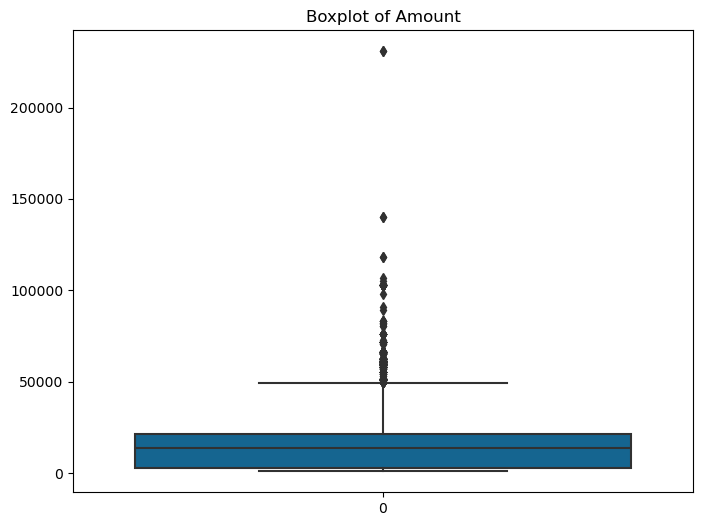

In [39]:
# Example for boxplot to detect outliers in 'Amount'
plt.figure(figsize=(8, 6))
sns.boxplot(sales_data['amount_paid'])
plt.title('Boxplot of Amount')
plt.show()

In [40]:
# Identify outliers in the 'Product Prices before paying' column using the IQR method
Q1 = sales_data['price'].quantile(0.25)
Q3 = sales_data['price'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = ~((sales_data['price'] >= (Q1 - 1.5 * IQR)) & (sales_data['price'] <= (Q3 + 1.5 * IQR)))
df_outliers = sales_data[outlier_condition]

# Display the number of missing values and the first few outliers
print('\
First few outliers:\
', df_outliers.head())

First few outliers:          date fisal_year  quarter product_number     payment_type  \
22 2018-06-04  2018-2019        1        P/M/A43  MOBILE PAYMENTS   
23 2018-06-04  2018-2019        1        P/M/A74  MOBILE PAYMENTS   
31 2018-07-04  2018-2019        1        P/M/A74            DEBIT   
43 2018-08-04  2018-2019        1        P/M/A42            DEBIT   
45 2018-08-04  2018-2019        1        P/M/A42           CREDIT   

   type_of_product  quantity     price  amount_paid type_of_accessory_mobile  \
22          MOBILE         1  57446.42     57946.42           FLAGSHIP PHONE   
23          MOBILE         1  60125.00     60625.00           FLAGSHIP PHONE   
31          MOBILE         1  60125.00     60625.00           FLAGSHIP PHONE   
43          MOBILE         1  51196.42     51696.42           FLAGSHIP PHONE   
45          MOBILE         1  51196.42     51696.42           FLAGSHIP PHONE   

    price_diff day_of_week  z_score_amount  
22       500.0      Monday        1.843

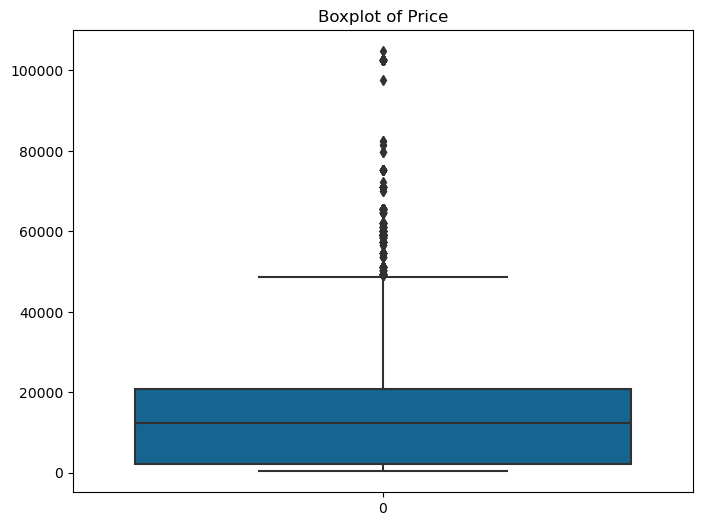

In [41]:
# Example for boxplot to detect outliers in 'Amount'
plt.figure(figsize=(8, 6))
sns.boxplot(sales_data['price'])
plt.title('Boxplot of Price')
plt.show()

In [42]:
sales_data

,date,fisal_year,quarter,product_number,payment_type,type_of_product,quantity,price,amount_paid,type_of_accessory_mobile,price_diff,day_of_week,z_score_amount
0,2018-01-04,2018-2019,1,P/A/36,CASH,ACCESSORY,1,2042.38,2542.38,COVER,500.00,Thursday,-0.784144
1,2018-01-04,2018-2019,1,P/A/47,CASH,ACCESSORY,1,2042.38,2118.64,WIRELESS HEADSET,76.26,Thursday,-0.804241
2,2018-01-04,2018-2019,1,P/M/A34,CREDIT,MOBILE,1,2042.38,13303.58,BUDGET PHONE,11261.20,Thursday,-0.273754
3,2018-01-04,2018-2019,1,P/M/A42,CREDIT,MOBILE,1,2042.38,51696.43,FLAGSHIP PHONE,49654.05,Thursday,1.547168
4,2018-01-04,2018-2019,1,P/M/A42,DEBIT,MOBILE,1,2042.38,51696.42,FLAGSHIP PHONE,49654.04,Thursday,1.547167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5991,2022-01-24,2021-2022,4,P/M/A16,DEBIT,MOBILE,1,27177.68,27677.68,MIDRANGE PHONE,500.00,Monday,0.407990
5992,2022-01-25,2021-2022,4,P/M/A16,MOBILE PAYMENTS,MOBILE,1,27177.68,27677.68,MIDRANGE PHONE,500.00,Tuesday,0.407990
5993,2022-01-02,2021-2022,4,P/M/A16,CREDIT,MOBILE,1,27177.68,27677.68,MIDRANGE PHONE,500.00,Sunday,0.407990
5994,2022-03-02,2021-2022,4,P/M/A16,MOBILE PAYMENTS,MOBILE,1,27177.68,27677.68,MIDRANGE PHONE,500.00,Wednesday,0.407990
